In [84]:
import pandas as pd

from datetime import datetime

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import sklearn.metrics 

from sklearn.impute import SimpleImputer

import numpy as np 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# matplotlib - customizable plots
import matplotlib
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error 

from sklearn.linear_model import Ridge

from matplotlib import pyplot 

from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib

In [85]:
#import the csv file
import numpy as np
import pandas as pd
import chardet
file = r"C:\Users\93691\Documents\DATA1030-Fall2021\YingSun_DATA1030_project\data\new.csv"
df_origin = pd.read_csv(file,encoding='ISO-8859-1',low_memory=False) #use low_memory=False in case columns have mixed type. 
df = df_origin.drop(columns=['url','id','Lng','Lat','Cid']) # create a new df in case of some origin features will be used later
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result
df = df.replace("????" and "nan",np.nan)
pd.set_option('display.max_columns', None) #display all columns
df = df.head(10000)

In [86]:
# change to the right data type
df['livingRoom'] = df['livingRoom'].apply(pd.to_numeric, errors='coerce')
df['livingRoom'] = df['livingRoom'].astype(int)
df['drawingRoom'] = df['drawingRoom'].apply(pd.to_numeric, errors='coerce')
df['drawingRoom'] = df['drawingRoom'].astype(int)
df['bathRoom'] = df['bathRoom'].apply(pd.to_numeric, errors='coerce')
df['bathRoom'] = df['bathRoom'].astype(int)
df['constructionTime'] = df['constructionTime'].apply(pd.to_numeric, errors='coerce')
print("done")

done


In [87]:
#convert tradeTime to int by delete "-"
df['tradeTime'] = df['tradeTime'].str.replace('-', '').astype(int)
print("done")

done


In [88]:
#only keep the integer part in floor
def floor_int(x):
    try:
        return int(x.split(' ')[1])
    except:
        return np.nan
df['floor'] = df['floor'].apply(floor_int)
print("done")

done


In [89]:
#some building type is <1, while it is a categorical feature, it only be 1,2,3,4. 
#I found that all other values except for 1:4 are all <1, so I use <1 here. 
df = df[df['buildingType']>=1]
print("done")

done


In [90]:
#check if all data are good to use
df.head(5)

,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,20160809,1464.0,106,415.0,31680,131.00,2,1,1,1,26,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,20160728,903.0,126,575.0,43436,132.38,2,2,1,2,22,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,20161211,1271.0,48,1030.0,52021,198.00,3,2,1,3,4,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,20160930,965.0,138,297.5,22202,134.00,3,1,1,1,21,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,20160828,927.0,286,392.0,48396,81.00,2,1,1,1,6,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [91]:
# missing value
ftrs = df.columns
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (9893, 21)
fraction of missing values in features:
constructionTime    0.026180
communityAverage    0.001011
dtype: float64
data types of the features with missing values:
constructionTime    float64
communityAverage    float64
dtype: object
fraction of points with missing values: 0.027089861518245224


In [92]:
print(df.shape)
del df["DOM"]
# by default, rows/points are dropped
df = df.dropna()
print(df.shape)

(9893, 21)
(9625, 20)


In [93]:
y = df['totalPrice'] 
X = df.loc[:, df.columns != 'totalPrice']

In [94]:
#baseline
df_baseline = df['totalPrice'].head(9625)
df_baseline.mean()

457.3860779220779

In [95]:
df.columns
ftr_names = X.columns

# ML Models

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from  sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from  sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [97]:
ordinal_ftrs = ['livingRoom','drawingRoom','kitchen','bathRoom','floor'] 
ordinal_cats = [['0','1','2','3','4','5','6','7','8','9'],['0','1','2','3','4','5'],['0','1','2','3'],['0','1','2','3','4','5','6','7'],['1','2','3', '4', '5','6', '7', '8', '9', '10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','42','57','63']]

onehot_ftrs = ['buildingType','renovationCondition','buildingStructure','elevator','fiveYearsProperty','subway','district']

std_ftrs = ['tradeTime','followers','price','square','ladderRatio','communityAverage','constructionTime']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

# ML pipeline

#The funciton below will be used for several times. choose proper lines for different uses

In [115]:
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    nr_states = 10
    test_scores = np.zeros(nr_states)
    #baseline_score = np.zeros(nr_states)
    best_models = []
    
    for i in range(nr_states):
        # first split to separate out the test set
        # we will use kfold on other
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

        # splitter for other
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)
        
        # put the pipe in the function
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ML_algo)])
        
        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(mean_squared_error, greater_is_better=False, 
                                                                              squared=False), cv=kf, 
                            return_train_score = True, n_jobs=-1, verbose=True)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        # save results into a data frame. feel free to print it and inspect it
        #results = pd.DataFrame(grid.cv_results_)
        #print(results)
        
        best_parameters = grid.best_params_
        #print('best parameters:', grid.best_params_)
        #print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        #final_models.append(grid)
        # calculate and save the test score
        y_test_pred = grid.predict(X_test)
        test_scores[i] = mean_squared_error(y_test,y_test_pred, squared=False)
        best_models.append(grid.best_estimator_)
        
        #baselines = [457.386077922] * len(y_test_pred)
        #baseline_score[i] = mean_squared_error(baselines,y_test_pred, squared=False)
    return test_scores, best_models#, baseline_score
    return grid, X_test, y_test

In [99]:
#Lasso: linear regression with l1 regularization
ML_algo = Lasso(max_iter=100000)
param_grid = {'regressor__alpha': np.logspace(-7,0,5)}
testscores, bestmodels, baseline_score = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(testscores)
print('mean:', np.mean(testscores), 'std:', np.std(testscores))
print('baseline_mean:', np.mean(baseline_score), 'baseline_std:', np.std(baseline_score))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
[ 86.60588699  93.8229954   87.21272121  94.7066401   95.24445756
  90.18435178  85.82318055  88.13620369 102.17304212  85.80696956]
mean: 90.9716448965871 std: 5.107230949725933
baseline_mean: 272.48621055454123 baseline_std: 5.528005500029997


In [113]:
#save the model
import pickle
filename = 'Lasso.joblib'
pickle.dump(testscores, open(filename, 'wb'))

In [116]:
# Ridge: linear regression with l2 regularization
ML_algo = Ridge(max_iter=100000)
param_grid = {'regressor__alpha': np.logspace(-7,0,5)}
testscores, bestmodels = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(testscores)
print('mean:', np.mean(testscores), 'std:', np.std(testscores))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
Fitting 4 folds for each of 5 candidates, totalling 20 fits
[ 86.62512313  93.83650635  87.25471388  94.72477397  95.25209324
  90.19481224  85.85456356  88.16238871 102.18147184  85.81149233]
mean: 90.98979392563227 std: 5.1018377675700615


In [118]:
#save the model
import pickle
filename = 'Ridge.joblib'
pickle.dump((testscores,bestmodels), open(filename, 'wb'))

In [119]:
#ElasticNet: linear regression with an elastic net
ML_algo = ElasticNet(max_iter=100000)
param_grid = {'regressor__alpha': np.logspace(-7,0,5),
             'regressor__l1_ratio': [0.1,0.2,0.3]}
testscores, bestmodels = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(testscores)
print('mean:', np.mean(testscores), 'std:', np.std(testscores))

Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
Fitting 4 folds for each of 15 candidates, totalling 60 fits
[ 86.61292844  93.83430775  87.2343982   94.7287239   95.24565815
  90.19116811  85.82181887  88.14134874 102.17676069  85.81082178]
mean: 90.97979346351296 std: 5.107558831597809


In [121]:
#save the model
import pickle
filename = 'ElasticNet.joblib'
pickle.dump((testscores,bestmodels), open(filename, 'wb'))

In [122]:
#random forest
from sklearn.ensemble import RandomForestRegressor

ML_algo = RandomForestRegressor(n_estimators=100)
param_grid = {'regressor__max_depth': [1,5,10,30],
             'regressor__min_samples_split': [2,6,10,16]}
testscores, bestmodels = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(testscores)
print('mean:', np.mean(testscores), 'std:', np.std(testscores))

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
[23.59370971 27.9204655  20.75020148 30.95842748 30.91373646 15.9005823
 16.69940901 19.91743925 31.44359557 25.29052628]
mean: 24.338809303103222 std: 5.601847289133924


In [123]:
#save the model
import pickle
filename = 'RF.joblib'
pickle.dump((testscores,bestmodels), open(filename, 'wb'))

# global1: permutation

In [ ]:
grid, X_test, y_test = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

In [ ]:
np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

In [ ]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

# global2: mean decrease in impurity

In [20]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6,random_state=42)
X_CV, X_test, y_CV, y_test = train_test_split(X_other, y_other, test_size=0.5,random_state=42)
forest = RandomForestRegressor(max_depth = 10, min_samples_split = 2)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [21]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.025 seconds


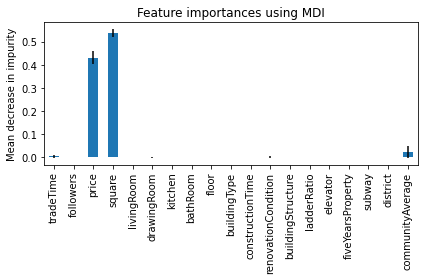

In [23]:
import pandas as pd

forest_importances = pd.Series(importances, index=ftr_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# global3: RandomForestRegressor.featureimportances

In [25]:
# create regressor object 

regressor = RandomForestRegressor(n_estimators = 1, random_state = 0, max_depth = 10, n_jobs = -1) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
regressor.feature_importances_
predictions = regressor.predict(X_test)

y_train_pred = regressor.predict(X_train) # predict y-value from X-train
y_test_pred = regressor.predict(X_test) # predict y-value from X-test

# Step 3: Mean Squared Error
mse_rfr = mean_squared_error(y_test,y_test_pred) 

In [26]:
X_train.columns

Index(['tradeTime', 'followers', 'price', 'square', 'livingRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'buildingType',
       'constructionTime', 'renovationCondition', 'buildingStructure',
       'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage'],
      dtype='object')

In [28]:
y_values = regressor.feature_importances_
x_values = X_train.columns
feature_data = list(zip(X_train.columns,y_values))

In [29]:
feature_data

[('tradeTime', 0.003349953137259528),
 ('followers', 0.0004883222150978602),
 ('price', 0.42538839307248827),
 ('square', 0.5411158175319528),
 ('livingRoom', 6.82183437992054e-06),
 ('drawingRoom', 5.8974129288546735e-05),
 ('kitchen', 6.224975997544203e-05),
 ('bathRoom', 4.590999251155593e-05),
 ('floor', 0.0002671322141753815),
 ('buildingType', 2.826619122789333e-05),
 ('constructionTime', 0.0004119372161872618),
 ('renovationCondition', 9.519147376656728e-05),
 ('buildingStructure', 2.337163579472546e-06),
 ('ladderRatio', 0.0008023171106800316),
 ('elevator', 1.0319451909933034e-05),
 ('fiveYearsProperty', 6.286246658463457e-05),
 ('subway', 0.0001268174554717373),
 ('district', 2.1406052920942268e-05),
 ('communityAverage', 0.02765497153054236)]

In [30]:
df_rf = pd.DataFrame(y_values, index=x_values)

<AxesSubplot:>

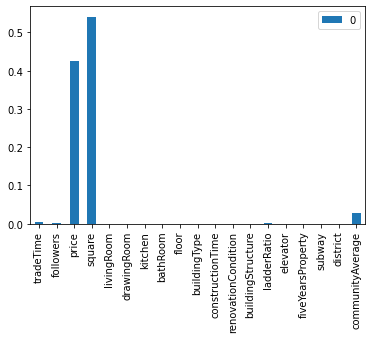

In [31]:
df_rf.plot.bar()

# SHAP values for local feature importance

In [43]:
ML_algo = RandomForestRegressor(n_estimators=100)
param_grid = {'regressor__max_depth': [1,5,10,30],
             'regressor__min_samples_split': [2,6,10,16]}

grid, X_test, y_test = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
-32.715472878368736
-26.34059104387041
{'regressor__max_depth': 10, 'regressor__min_samples_split': 2}


In [82]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(1925, 45)
(1000, 45)


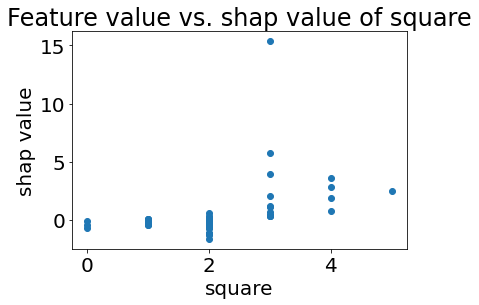

In [134]:
matplotlib.rcParams.update({'font.size': 20})
ftr = 'square'
indx = np.argwhere(ftr_names=='square')
plt.scatter(X_test_transformed[:1000,indx],shap_values[:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.title('Feature value vs. shap value of square')
plt.show()

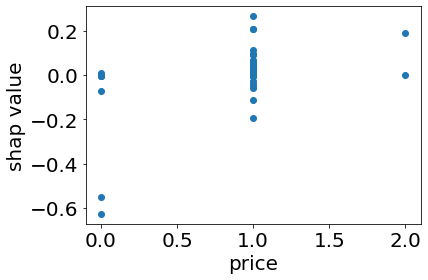

In [80]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
ftr = 'price'
indx = np.argwhere(ftr_names=='price')
plt.scatter(X_test_transformed[:1000,indx],shap_values[:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.show()

IndexError: index 41 is out of bounds for axis 0 with size 19

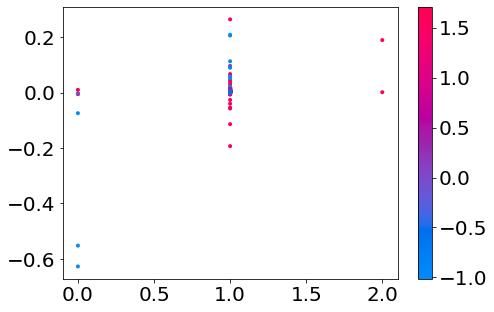

In [81]:
#dependence plot
shap.dependence_plot(ftr, shap_values, X_test_transformed[:1000], feature_names=ftr_names)

IndexError: index 22 is out of bounds for axis 0 with size 19

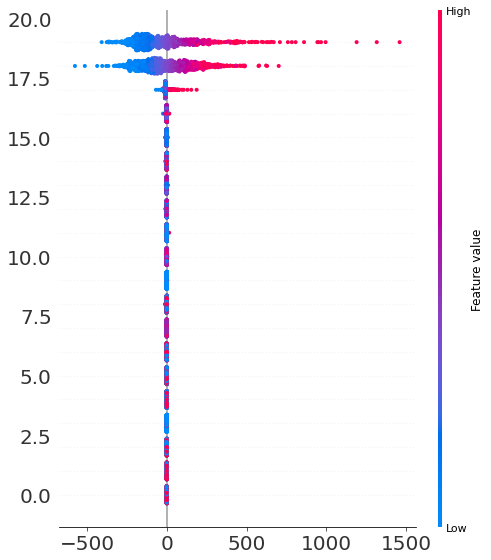

In [76]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = ftr_names)

In [124]:
#SVR
ML_algo = SVR()
param_grid = {'regressor__C': [0.01, 0.1, 1, 10],
              'regressor__gamma': [0.001, 0.01, 0.1, 1]} 
testscores, bestmodels = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(testscores)
print('mean:', np.mean(testscores), 'std:', np.std(testscores))

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Fitting 4 folds for each of 16 candidates, totalling 64 fits
[120.58914106 139.79283633 117.02910296 133.07123663 132.7679714
 121.24729442  99.52697644 112.1471892  137.33073642 120.31036822]
mean: 123.38128530769625 std: 11.846075010210207


In [125]:
#save the model
import pickle
filename = 'SVR.joblib'
pickle.dump(testscores, open(filename, 'wb'))

In [126]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

ML_algo = KNeighborsRegressor()
param_grid = {'regressor__n_neighbors': [1,10,30,100]} 
testscores, bestmodels = MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid)
print(testscores)
print('mean:', np.mean(testscores), 'std:', np.std(testscores))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
[109.37234394 121.23396444 105.69503844 121.89952559 120.44388257
 110.83329315 100.08542087 105.77144978 121.163887   111.3168831 ]
mean: 112.78156888716494 std: 7.494472553913257


In [127]:
#save the model
import pickle
filename = 'KNN.joblib'
pickle.dump(testscores, open(filename, 'wb'))

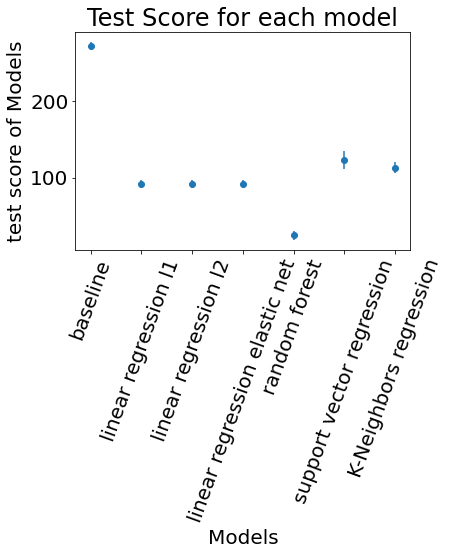

In [128]:
#compare
import matplotlib.pyplot as plt

means = [272.48621055454123, 90.9716448965871, 90.98979392563227, 90.97979346351296, 23.981473150982378, 123.38128530769625, 112.78156888716494]
sds = [5.528005500029997, 5.107230949725933, 5.1018377675700615, 5.107558831597809, 5.717544003926106, 11.846075010210207, 7.494472553913257]

X_list = ['baseline', 'linear regression l1', 'linear regression l2', 'linear regression elastic net', 'random forest', 'support vector regression', 'K-Neighbors regression']
plt.errorbar(X_list, y = means, yerr = sds,fmt = 'o')
plt.xlabel('Models')
plt.ylabel('test score of Models')
plt.xticks(rotation=70)
plt.title('Test Score for each model')
plt.show()


In [ ]:
print('')